In [1]:
from package import process_dataset
from package import encoder
from package import models

import numpy as np

from sklearn.model_selection import train_test_split
import pandas as pd

Loaded  7 encoders.


/home/gustavo/.local/lib/python3.10/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 0.1.43ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
/home/gustavo/.local/lib/python3.10/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 1.1build1 is an invalid version and will not be supported in a future release
  warnings.warn(


In [2]:
description = pd.read_csv("data/dicionario.csv", encoding='latin-1')
train = pd.read_csv("data/dados_treino_hackaton.csv", encoding='latin-1', index_col=False)
test = pd.read_csv("data/dados_teste_x_hackaton.csv", encoding='latin-1', index_col=False)

del train['Unnamed: 0']
del test['Unnamed: 0']

In [3]:
train = encoder.encode_DataFrame(train)
train = process_dataset.processColumns(train)

In [4]:
train_cols, target = process_dataset.generate_labels(train)

In [89]:
train[train_cols]

,Classificacao_da_Oportunidade,Faixa_de_Faturamento_Agregado,Data_Real_de_Encerramento_da_Opp2,numero_relacionamentos,numero_relacionamentos_convertidos,intervalo_tempo,Valor_corrigido2,Forma_de_Contratacao_Agregado,n_solucoes,Desdobramento de metas,...,Produtos digitais,Segmentacao,Carteira_Nova,Segmento_Agregado2,Total_HH,Custo_Total,Margem_Total,Custo_Total_per_Valor_corrigido2,numero_relacionamentos_convertidos_per_numero_relacionamentos,Gestão da Receita_per_Gestão de Gastos
0,0,6,0,1,0,0.00,5.035363e+05,0,1,1,...,0,2,5,20,115.0,151368.42,0.567519,0.300611,0.000000,0
1,1,5,1,2,1,2.03,6.186303e+05,3,1,0,...,0,0,0,5,205.0,183543.74,0.573154,0.296694,0.500000,1
2,2,0,2,8,5,6.27,2.700289e+06,3,1,0,...,0,1,5,16,472.0,725715.00,0.615311,0.268755,0.625000,0
3,0,6,3,1,0,0.00,4.580399e+04,0,1,0,...,0,0,1,9,4.0,24540.16,0.233120,0.535765,0.000000,0
4,2,0,4,6,5,4.37,4.424331e+06,3,1,0,...,0,0,3,18,691.0,1639159.66,0.545262,0.370488,0.833333,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,1,5,278,3,0,19.43,9.431257e+05,0,1,0,...,0,0,2,18,302.0,380656.50,0.470575,0.403612,0.000000,0
609,1,0,278,2,0,38.53,2.557851e+05,0,1,0,...,0,3,5,15,62.0,103393.16,0.469779,0.404219,0.000000,0
610,2,6,279,2,1,27.67,2.832343e+05,3,1,1,...,0,3,5,11,91.0,113290.31,0.475328,0.399988,0.500000,0
611,0,2,280,1,0,0.00,1.695306e+06,0,2,0,...,0,0,1,3,384.0,543069.12,0.579808,0.320337,0.000000,0


In [6]:
X = process_dataset.scaleData(train[train_cols], useSaved=False)
y = train[target]

In [128]:
#podemos variar o test_size de 0.1 até 0.2 ver como os modelos treinam melhor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

## Linear regression

In [129]:
from sklearn.linear_model import LinearRegression

In [130]:
lin = LinearRegression()

In [131]:
lin.fit(X_train, y_train)

LinearRegression()

In [132]:
pred = lin.predict(X_test)

In [133]:
pred

array([7.69273180e-01, 4.10912179e-01, 5.40329857e-01, 1.47911651e-01,
       4.78752214e-01, 3.44300757e-01, 5.53762753e-01, 8.28671014e-01,
       7.03828997e-01, 2.09444582e-01, 4.76432031e-01, 4.31728806e-01,
       4.59086718e-01, 4.31599449e-01, 2.51040661e-01, 6.24696874e-01,
       4.49664628e-01, 5.69977522e-01, 4.75462764e-02, 3.02904666e-01,
       5.55661446e-02, 6.91755847e-01, 7.45400430e-02, 6.38901240e-01,
       3.55926111e-01, 3.11201380e-01, 2.44419960e-01, 3.89249533e-01,
       1.13435094e-01, 7.29995335e-01, 2.85639538e-01, 8.72157702e-01,
       3.52489779e-01, 9.34200248e-01, 9.23403654e-01, 1.92083704e-01,
       3.85621648e-01, 1.39719279e+00, 4.55060271e-01, 5.84775551e-01,
       8.95973912e-01, 5.25273888e-01, 1.29864977e+00, 3.20550191e-01,
       6.64032248e-01, 5.17099461e-01, 3.36741659e-01, 7.98926995e-01,
       6.96434875e-01, 3.75508266e-01, 7.78254021e-04, 9.36706600e-01,
       3.40653189e-01, 7.39783558e-01, 9.36149486e-01, 7.84827022e-01,
      

In [134]:
y_test

224    1
20     0
254    0
130    0
257    0
      ..
30     1
603    1
458    0
72     0
16     1
Name: id_fechou, Length: 62, dtype: int64

In [135]:
ypred = models.convertPredicted(pred)

models.run_analysis(ypred, y_test)

              precision    recall  f1-score   support

           0       0.64      0.81      0.71        26
           1       0.83      0.67      0.74        36

    accuracy                           0.73        62
   macro avg       0.73      0.74      0.73        62
weighted avg       0.75      0.73      0.73        62

Accuracy score:  0.7258064516129032
Mean Squared Error:  0.27419354838709675
roc_auc score:  0.7371794871794871





In [136]:
import matplotlib.pyplot as plt

In [137]:
from sklearn.metrics import confusion_matrix, roc_curve, classification_report

In [14]:
import ast

In [15]:
classification_report(y_test, ypred)

'              precision    recall  f1-score   support\n\n           0       0.79      0.76      0.77        63\n           1       0.76      0.78      0.77        60\n\n    accuracy                           0.77       123\n   macro avg       0.77      0.77      0.77       123\nweighted avg       0.77      0.77      0.77       123\n'

In [16]:
ast.literal_eval(str(confusion_matrix(y_test, ypred)).replace(" ", ","))

[[48, 15], [13, 47]]

In [17]:
fpr, tpr, _  = roc_curve(y_test,  pred)

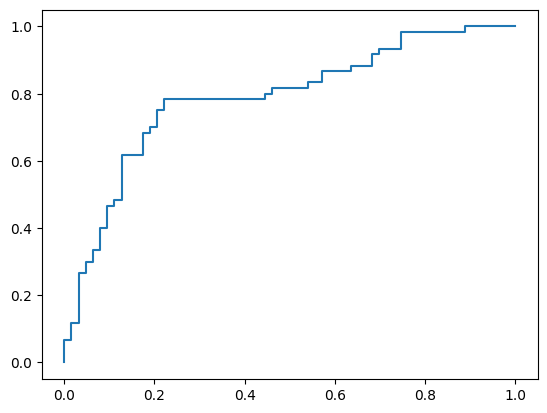

In [18]:
plt.plot(fpr,tpr)

## Decision tree regressor

In [19]:
from sklearn.tree import DecisionTreeRegressor

In [20]:
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [21]:
models.run_analysis(tree.predict(X_test), y_test)

              precision    recall  f1-score   support

           0       0.62      0.65      0.64        63
           1       0.61      0.58      0.60        60

    accuracy                           0.62       123
   macro avg       0.62      0.62      0.62       123
weighted avg       0.62      0.62      0.62       123

Accuracy score:  0.6178861788617886
Mean Squared Error:  0.3821138211382114
roc_auc score:  0.6170634920634921





## Random Forest Regressor

In [22]:
from sklearn.ensemble import RandomForestRegressor

In [23]:
forest = RandomForestRegressor()
forest.fit(X_train, y_train)

RandomForestRegressor()

In [24]:
ypred = models.convertPredicted(forest.predict(X_test))

In [25]:
models.run_analysis(ypred, y_test)

              precision    recall  f1-score   support

           0       0.70      0.78      0.74        63
           1       0.74      0.65      0.69        60

    accuracy                           0.72       123
   macro avg       0.72      0.71      0.71       123
weighted avg       0.72      0.72      0.71       123

Accuracy score:  0.7154471544715447
Mean Squared Error:  0.2845528455284553
roc_auc score:  0.7138888888888888





## Testing polynomial regressor

In [26]:
from sklearn.preprocessing import PolynomialFeatures

In [27]:
p = PolynomialFeatures(degree = 3, include_bias=False)

In [28]:
pX_train = p.fit_transform(X_train)

In [29]:
lin = LinearRegression()
lin.fit(pX_train, y_train)

LinearRegression()

In [30]:
pred = lin.predict(p.transform(X_test))
ypred = models.convertPredicted(pred)
models.run_analysis(ypred, y_test)

              precision    recall  f1-score   support

           0       0.54      0.54      0.54        63
           1       0.52      0.52      0.52        60

    accuracy                           0.53       123
   macro avg       0.53      0.53      0.53       123
weighted avg       0.53      0.53      0.53       123

Accuracy score:  0.5284552845528455
Mean Squared Error:  0.4715447154471545
roc_auc score:  0.5281746031746033





## SGD Regression

In [138]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

from sklearn.base import clone

In [139]:
sgd = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True, penalty=None, learning_rate="constant", eta0=0.0005)

In [140]:
minimal_error = float("inf")
best_epoch = None
best_model = None

for epoch in range(6000):
    sgd.fit(X_train, y_train)
    y_val_pred = sgd.predict(X_test)
    val_error = mean_squared_error(y_test, y_val_pred)
    if val_error < minimal_error:
        minimal_error = val_error
        best_epoch = epoch
        best_model = clone(sgd)


In [141]:
ypred = models.convertPredicted(sgd.predict(X_test))
models.run_analysis(ypred, y_test)

              precision    recall  f1-score   support

           0       0.64      0.81      0.71        26
           1       0.83      0.67      0.74        36

    accuracy                           0.73        62
   macro avg       0.73      0.74      0.73        62
weighted avg       0.75      0.73      0.73        62

Accuracy score:  0.7258064516129032
Mean Squared Error:  0.27419354838709675
roc_auc score:  0.7371794871794871





## Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
log = LogisticRegression()

In [37]:
log.fit(X_train, y_train)

LogisticRegression()

In [38]:
ypred = log.predict(X_test)
models.run_analysis(ypred, y_test)

              precision    recall  f1-score   support

           0       0.77      0.73      0.75        63
           1       0.73      0.77      0.75        60

    accuracy                           0.75       123
   macro avg       0.75      0.75      0.75       123
weighted avg       0.75      0.75      0.75       123

Accuracy score:  0.7479674796747967
Mean Squared Error:  0.25203252032520324
roc_auc score:  0.7484126984126984





## Support vector machines

In [39]:
from sklearn.svm import LinearSVC

In [40]:
svm = LinearSVC()
svm.fit(X_train, y_train)

LinearSVC()

In [41]:
ypred = svm.predict(X_test)
models.run_analysis(ypred, y_test)

              precision    recall  f1-score   support

           0       0.78      0.75      0.76        63
           1       0.75      0.78      0.76        60

    accuracy                           0.76       123
   macro avg       0.76      0.76      0.76       123
weighted avg       0.77      0.76      0.76       123

Accuracy score:  0.7642276422764228
Mean Squared Error:  0.23577235772357724
roc_auc score:  0.7646825396825396





In [42]:
from sklearn.svm import SVC

In [43]:
svm = SVC(kernel='poly', C=10)
svm.fit(X_train, y_train)

SVC(C=10, kernel='poly')

In [44]:
ypred = svm.predict(X_test)
models.run_analysis(ypred, y_test)

              precision    recall  f1-score   support

           0       0.70      0.73      0.71        63
           1       0.70      0.67      0.68        60

    accuracy                           0.70       123
   macro avg       0.70      0.70      0.70       123
weighted avg       0.70      0.70      0.70       123

Accuracy score:  0.6991869918699187
Mean Squared Error:  0.3008130081300813
roc_auc score:  0.6984126984126984





## Decision tree classifier

In [45]:
from sklearn.tree import DecisionTreeClassifier

In [46]:
tree = DecisionTreeClassifier(max_depth=2)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [47]:
ypred = tree.predict(X_test)
models.run_analysis(ypred, y_test)

              precision    recall  f1-score   support

           0       0.64      0.78      0.71        63
           1       0.70      0.55      0.62        60

    accuracy                           0.67       123
   macro avg       0.67      0.66      0.66       123
weighted avg       0.67      0.67      0.66       123

Accuracy score:  0.6666666666666666
Mean Squared Error:  0.3333333333333333
roc_auc score:  0.663888888888889





In [48]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier

In [49]:
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()

In [50]:
voting = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)], voting='hard'
)
voting.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()), ('svc', SVC())])

In [51]:
ypred = voting.predict(X_test)
models.run_analysis(ypred, y_test)

              precision    recall  f1-score   support

           0       0.73      0.76      0.74        63
           1       0.74      0.70      0.72        60

    accuracy                           0.73       123
   macro avg       0.73      0.73      0.73       123
weighted avg       0.73      0.73      0.73       123

Accuracy score:  0.7317073170731707
Mean Squared Error:  0.2682926829268293
roc_auc score:  0.7309523809523809





In [52]:
import xgboost

In [53]:
xgb = xgboost.XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [54]:
ypred = xgb.predict(X_test)
models.run_analysis(ypred, y_test)

              precision    recall  f1-score   support

           0       0.70      0.75      0.72        63
           1       0.71      0.67      0.69        60

    accuracy                           0.71       123
   macro avg       0.71      0.71      0.71       123
weighted avg       0.71      0.71      0.71       123

Accuracy score:  0.7073170731707317
Mean Squared Error:  0.2926829268292683
roc_auc score:  0.7063492063492063





In [142]:
xgb = xgboost.XGBClassifier(
        max_depth=2,
        gamma=0.1,
        eta=1.5,
        reg_alpha=1.1,
        reg_lambda=0.7)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False, eta=1.5,
              eval_metric=None, gamma=0.1, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=1.5, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=2, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=1.1, ...)

In [143]:
ypred = xgb.predict(X_test)
models.run_analysis(ypred, y_test)

              precision    recall  f1-score   support

           0       0.57      0.65      0.61        26
           1       0.72      0.64      0.68        36

    accuracy                           0.65        62
   macro avg       0.64      0.65      0.64        62
weighted avg       0.65      0.65      0.65        62

Accuracy score:  0.6451612903225806
Mean Squared Error:  0.3548387096774194
roc_auc score:  0.6463675213675213





In [83]:
from sklearn.metrics import accuracy_score

In [84]:
def run_XGB(X_train, X_test, y_train, y_test, max_depth=2, gamma=0.3, eta=0.5, reg_alpha=0.5, reg_lambda=0.7, prints=False):

    model = xgboost.XGBClassifier(
        max_depth=max_depth,
        gamma=gamma,
        eta=eta,
        reg_alpha=reg_alpha,
        reg_lambda=reg_lambda
    )

    model.fit(X_train, y_train)
    
    pred = model.predict(X_test)
    acc = accuracy_score(pred, y_test)
    
    return model, acc 

In [145]:
np.arange(0.1, 3, 0.2)

array([0.1, 0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 1.9, 2.1, 2.3, 2.5,
       2.7, 2.9])

In [85]:
lm = 0
for md in np.arange(1, 5):
    for gam in np.arange(0.1, 3, 0.2):
        for eta in np.arange(0.1, 2, 0.2):
            for ra in np.arange(0.1, 1.5, 0.2):
                for rl in np.arange(0.1, 1.5, 0.2):
                    _, r = run_XGB(X_train, X_test, y_train, y_test, md, gam, eta, ra, rl)
                    if r > lm:
                        lm = r
                        print("HIGHER ", lm)
                        print(md, gam, eta, ra, rl)
                        print("")

HIGHER  0.7317073170731707
1 0.1 0.1 0.1 0.1

HIGHER  0.7642276422764228
1 0.1 0.30000000000000004 0.1 0.1

HIGHER  0.7723577235772358
1 0.1 0.30000000000000004 0.1 0.9000000000000001

HIGHER  0.7804878048780488
1 0.1 0.30000000000000004 0.30000000000000004 1.3000000000000003

HIGHER  0.7886178861788617
1 0.1 1.1000000000000003 0.9000000000000001 0.9000000000000001

HIGHER  0.8048780487804879
2 0.1 0.9000000000000001 0.1 0.30000000000000004

HIGHER  0.8130081300813008
2 0.1 1.5000000000000004 1.3000000000000003 1.1000000000000003



KeyboardInterrupt: 

# Fine Tuning

In [59]:
from sklearn.model_selection import GridSearchCV

In [60]:
param_grid = [
    {'n_estimators': [3, 7, 10, 20, 30], 'max_features': [2, 4, 6, 8, 10]},
    {'bootstrap': [False], 'n_estimators': [3, 7, 10, 12], 'max_features': [2, 3, 4, 8, 12, 15]},
]

In [61]:
forest = RandomForestRegressor()

In [62]:
grid = GridSearchCV(forest, param_grid, cv=5, scoring="neg_mean_squared_error", return_train_score=True, refit=True)

In [63]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8, 10],
                          'n_estimators': [3, 7, 10, 20, 30]},
                         {'bootstrap': [False],
                          'max_features': [2, 3, 4, 8, 12, 15],
                          'n_estimators': [3, 7, 10, 12]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [64]:
grid.best_params_

{'max_features': 6, 'n_estimators': 20}

In [65]:
ypred = models.convertPredicted(grid.predict(X_test))

In [66]:
models.run_analysis(ypred, y_test)

              precision    recall  f1-score   support

           0       0.65      0.76      0.70        63
           1       0.69      0.57      0.62        60

    accuracy                           0.67       123
   macro avg       0.67      0.66      0.66       123
weighted avg       0.67      0.67      0.66       123

Accuracy score:  0.6666666666666666
Mean Squared Error:  0.3333333333333333
roc_auc score:  0.6642857142857143





## Importancia de colunas

In [68]:
sorted(zip(grid.best_estimator_.feature_importances_, train_cols))

[(0.007352370756300068, 'Produtos digitais'),
 (0.011183698020567599, 'Desdobramento de metas'),
 (0.014418867149368728, 'Processes Excellence'),
 (0.015982270336099787, 'n_solucoes'),
 (0.016747719144998983, 'Gestão da Receita_per_Gestão de Gastos'),
 (0.027593004968354252, 'Gestão da Operação'),
 (0.027860640436120594, 'numero_relacionamentos_convertidos'),
 (0.031658920749696236, 'Forma_de_Contratacao_Agregado'),
 (0.0353008932817207, 'numero_relacionamentos'),
 (0.036211275838360445, 'Faixa_de_Faturamento_Agregado'),
 (0.038508712551839866, 'Carteira_Nova'),
 (0.04317476382889312, 'Classificacao_da_Oportunidade'),
 (0.051019106282418236, 'Segmentacao'),
 (0.05411990942274823,
  'numero_relacionamentos_convertidos_per_numero_relacionamentos'),
 (0.055098638781501216, 'intervalo_tempo'),
 (0.056771482002475816, 'Segmento_Agregado2'),
 (0.06473088705900854, 'Total_HH'),
 (0.0648181169745398, 'Valor_corrigido2'),
 (0.0742810738893781, 'Data_Real_de_Encerramento_da_Opp2'),
 (0.086004655

## Using cross validation

In [69]:
from sklearn.model_selection import cross_val_score, cross_val_predict

In [70]:
scores = cross_val_score(tree, X, y, scoring="neg_mean_squared_error", cv=10)

In [73]:
def display_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Std: ", scores.std())

In [74]:
display_scores(np.sqrt(-scores))

Scores:  [0.53881591 0.5819877  0.5819877  0.55809982 0.65286255 0.66529914
 0.57259833 0.52790958 0.6005462  0.6005462 ]
Mean:  0.5880653123548789
Std:  0.0421076487647239


In [75]:
models.run_analysis(cross_val_predict(tree, X, y, cv=10), y)

              precision    recall  f1-score   support

           0       0.64      0.79      0.71       326
           1       0.68      0.49      0.57       287

    accuracy                           0.65       613
   macro avg       0.66      0.64      0.64       613
weighted avg       0.66      0.65      0.64       613

Accuracy score:  0.6525285481239804
Mean Squared Error:  0.3474714518760196
roc_auc score:  0.6428838631068168



